In [46]:
%reload_ext autoreload
%autoreload 2
from importlib import reload
import mysql.connector
from mysql.connector import errorcode
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

import numpy as np
import math
from PIL import Image as im
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

from src.db import DB


In [47]:
db = DB()

ZoneSize=100
100 100 400
ZoneSize=100
100 200 200
[0.355, 0.662, 0.49, 0.021, 0.049, 0.819, 0.611, 0.089, 0.805, 0.473, 0.88, 0.371, 0.81, 0.526, 0.178, 0.059, 0.476, 0.068]
[216.773, 162.276, 37.022, 207.05, 41.0, 183.461, 111.195, 40.794, 215.525, 36.112, 92.324, 74.739, 138.748, 188.539, 57.938, 149.665, 195.231, 109.857]
[28.266, 87.361, 19.18, 38.351, 72.058, 44.014, 23.554, 95.04, 16.139, 64.006, 57.797, 22.349, 26.616, 42.326, 7.509, 50.331, 40.671, 90.208]
(5000, 5000)
DescribeResult(nobs=25000000, minmax=(0, 255), mean=110.73328908, variance=1069.329081858315, skewness=0.05754089485205881, kurtosis=0.007171745803452811)


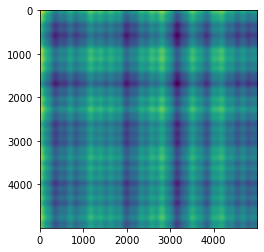

In [50]:
import math
def getZone(x,y):
    zoneSize = int(db.getParameter('ZoneSize'))
    print(f"ZoneSize={zoneSize}")
    return (zoneSize, math.floor(x/zoneSize), math.floor(y/zoneSize))

def generate(x,y, coeffs, denom, intercept):
    sum = 0
    num_coeffs = int(len(coeffs)/2)
    #print(type(num_coeffs),num_coeffs)
    for i in range(0,num_coeffs*2,2):
        sum += coeffs[i] * math.cos( x / denom[i] ) + intercept[i]
        sum += coeffs[i+1] * math.cos( y / denom[i+1] ) + intercept[i+1]
    return sum

def getWorldParameters(x,y):
    zoneSize, startx, starty = getZone(x,y)
    startx = startx * zoneSize
    starty = starty * zoneSize
    print(zoneSize, startx, starty)
    zoneSize = 5000
    
    coeff_str = db.getWorldState('coeffs')
    denom_str = db.getWorldState('denom')
    intercepts_str = db.getWorldState('intercepts')
    coeffs = list(map(float,coeff_str.split(',')))
    denom = list(map(float,denom_str.split(',')))
    intercepts = list(map(float,intercepts_str.split(',')))
    print(coeffs)
    print(denom)
    print(intercepts)
    array = np.zeros((zoneSize,zoneSize))
    start = 0
    for x in range(start,zoneSize+start):
        for y in range(start,zoneSize+start):
            array[y-start][x-start] = generate(x+1,y+1, coeffs, denom, intercepts)
    
    #array = np.array(array)
    if 1:
        array = array.reshape(-1, 1) 
        scaler = MinMaxScaler()
        array = scaler.fit_transform(array)
        array = array * 255
        array = array.astype(int)
        array = array.reshape(zoneSize,zoneSize)
        #array = np.squeeze(array)
    print(array.shape)
    print(stats.describe(array,axis=None))
    #print(array)
    plt.imshow(array, cmap='viridis', interpolation='none')
    plt.show()

def generateZone(x,y):
    zoneSize, startx, starty = getZone(x,y)
    startx = startx * zoneSize
    starty = starty * zoneSize
    print(zoneSize, startx, starty)
    
generateZone(140,420)
getWorldParameters(225,225)